# Q: Implement a simple deep neural network (DNN) for solving the polynomial equation $y = 5x^3 − 10x^2 − 20x + 10$ with the following specifications:


**Import Necessary Modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import metrics

**polynomial equation** $y = 5x^3 − 10x^2 − 20x + 10$


In [2]:
def polynomial_equation(x):
  return (5*(x**3) - 10*(x**2) - 20*x + 10)

**a) Use three hidden-layers of sizes 32, 64, and 128 and build generated DNN**

In [3]:
def DNN_MODEL():
  input = Input((1,), name='Input Layer')
  hidden_layer = Dense(32, activation='relu')(input)
  hidden_layer = Dense(64, activation='relu')(hidden_layer)
  hidden_layer = Dense(128, activation='relu')(hidden_layer)
  output = Dense(1, name='Output_Layer')(hidden_layer)

  model = Model(input, output, name="DNN_MODEL")

  return model

**Display the generated DNN with the required number of parameters.**

In [4]:
model = DNN_MODEL()
model.summary()

Model: "DNN_MODEL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

**b) Generate training samples within the range of -20 to +20.**

In [5]:
def generate_samples(n):
  x = np.random.uniform(-20, 20, n)
  y = polynomial_equation(x)
  return x, y

**b) Use an appropriate method for normalizing the training data in the range of -1 to +1.**

In [6]:
def normalizing(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

**c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.**

In [7]:
# number of samples
n = 1000
x, y = generate_samples(n)

# Normalization
x_norm = normalizing(x)
y_norm = normalizing(y);

# Train
x_train, y_train = x_norm[ : int(n * 0.9)], y_norm[ : int(n * 0.9)]

# Validation
x_val, y_val = x_norm[int(n * 0.9) : int(n * 0.95)], y_norm[int(n * 0.9) : int(n * 0.95)]

# Test
x_test, y_test = x_norm[int(n * 0.95) : ], y_norm[int(n * 0.95) : ]


Training set: 90% of the data (4500 points) for training the model.

Validation set: 5% of the data (250 points) for checking the accuracy of the model learning.

Test set: 5% of the data (250 points) for testing the final performance of the model

**Model Compiler and Model Fit and History**

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history = fitted_model.history

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2092 - loss: 0.0967 - val_accuracy: 0.8204 - val_loss: 0.0229
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 0.0227 - val_accuracy: 0.8961 - val_loss: 0.0132
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9097 - loss: 0.0122 - val_accuracy: 0.9500 - val_loss: 0.0064
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9665 - loss: 0.0043 - val_accuracy: 0.9830 - val_loss: 0.0022
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9862 - loss: 0.0017 - val_accuracy: 0.9931 - val_loss: 8.8356e-04
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 8.4910e-04 - val_accuracy: 0.9967 - val_loss: 4.2492e-04
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9955 - loss: 5.4290e-04 - val_accuracy: 0.9975 - val_loss: 3.1314e-04
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9968 - loss: 4.0837e-04 - val_acc

**d) Display the training accuracy vs validation accuracy and training error vs validation error curves.**


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9974 - loss: 3.2465e-04
Test Loss:  0.00033478118712082505
Test Accuracy:  0.9972149133682251
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


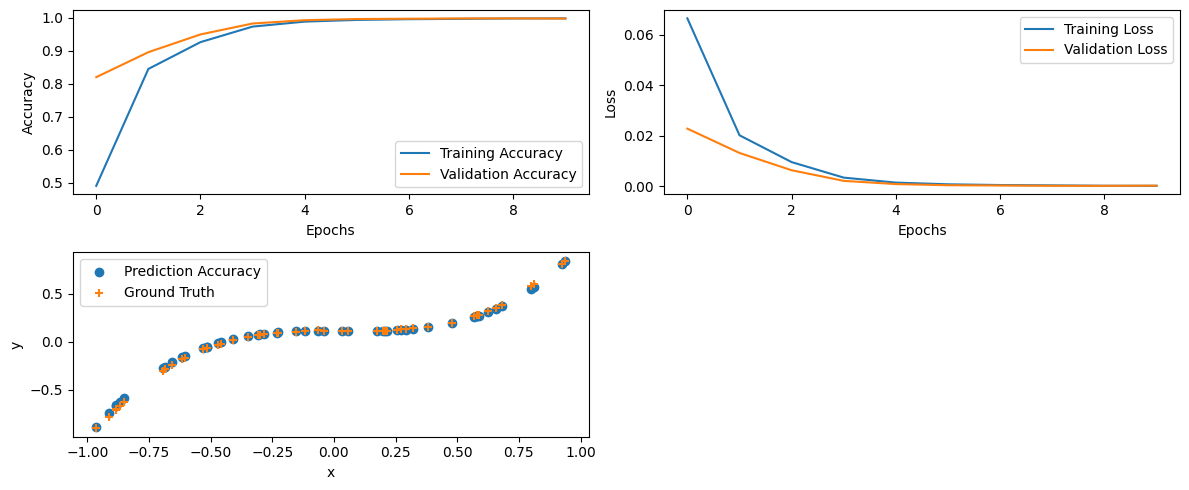

In [9]:
plt.figure(figsize=(12, 5))

# plot Training and Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

# plot Training and Validation Loss
plt.subplot(2, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

#Predict on test data
prediction = model.predict(x_test)

# Plot prediction accuracy vs ground truth
plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker = 'o')
plt.scatter(x_test, prediction, marker = '+')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Prediction Accuracy', 'Ground Truth'])

plt.tight_layout()
plt.show()